[Notebook](https://bknudson1.github.io/)

# Covid Economy
### Diego Oldenburg, Benedicte Knudson, Alex Abadi
Milestone 2 </br>


We have shifted our scope from nationwide labor statistics to local labor statistics. We have unemployment rates in Orleans parish since January 2020. We've also found data on mask mandates in Orleans Parish and plotted them alongside Orleans Parish unemployment rates. We plan on also investigating vaccine mandates, stimulus checks, and other COVID relevant data. Ultimately, we want to see how strongly each of these aspects of COVID impact unemployment rates. We might also want to compare some of these local statistics to nationwide statistics, and since we scraped a lot of nationwide data for Milestone 1 we'll leave those cells in.

In [1]:
from bs4 import BeautifulSoup as bs
import requests as requests
import pandas as pd
import numpy as np
import lxml as lx
from datetime import date

**Unemployment rates from 2011 to 2021** (THIS IS FROM MILESTONE 1)

In [2]:
url = 'https://data.bls.gov/timeseries/LNS14000000?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_unemp = pd.read_html(prettyTable)
df_unemp = pd.concat(dfs_unemp)
df_unemp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
1,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
3,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
4,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0


**CPI for all urban consumers 2011-2021**

In [3]:

url = 'https://data.bls.gov/timeseries/CUSR0000SA0?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_cpi = pd.read_html(prettyTable)
df_cpi = pd.concat(dfs_cpi)
df_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2011,221.187,221.898,223.046,224.093,224.806,224.806,225.395,226.106,226.597,226.750,227.169,227.223,NaN,NaN
1,2012,227.842,228.329,228.807,229.187,228.713,228.524,228.590,229.918,231.015,231.638,231.249,231.221,NaN,NaN
2,2013,231.679,232.937,232.282,231.797,231.893,232.445,232.900,233.456,233.544,233.669,234.100,234.719,NaN,NaN
3,2014,235.288,235.547,236.028,236.468,236.918,237.231,237.498,237.460,237.477,237.430,236.983,236.252,NaN,NaN
4,2015,234.747,235.342,235.976,236.222,237.001,237.657,238.034,238.033,237.498,237.733,238.017,237.761,NaN,NaN
5,2016,237.652,237.336,238.080,238.992,239.557,240.222,240.101,240.545,241.176,241.741,242.026,242.637,NaN,NaN
6,2017,243.620,243.872,243.766,244.274,244.069,244.218,244.280,245.205,246.551,246.657,247.378,247.736,NaN,NaN
7,2018,248.721,249.300,249.517,250.275,250.786,251.152,251.345,251.735,252.183,252.899,252.822,252.493,NaN,NaN
8,2019,252.441,252.969,254.147,255.326,255.371,255.423,255.925,256.118,256.532,257.387,257.989,258.203,NaN,NaN
9,2020,258.687,258.824,257.989,256.192,255.942,257.282,258.604,259.511,260.149,260.462,260.927,261.560,NaN,NaN


**Import price index 2011-2021**

In [4]:
url = 'https://data.bls.gov/timeseries/EIUIR?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_ipi = pd.read_html(prettyTable)
df_ipi = pd.concat(dfs_ipi)
df_ipi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,133.0,135.3,139.3,142.9,143.1,142.2,142.4,141.9,141.7,141.2,142.2,142.2
1,2012,142.2,142.2,144.2,144.1,142.0,138.7,137.7,139.4,140.8,141.2,140.2,139.4
2,2013,140.1,141.3,141.2,140.2,139.4,138.8,138.9,139.4,139.8,138.9,137.7,137.8
3,2014,138.3,139.8,140.5,139.7,140.1,140.5,140.1,139.0,137.9,136.0,133.5,130.1
4,2015,126.0,125.5,125.3,125.1,126.5,126.6,125.4,123.2,121.9,121.5,120.8,119.3


**PPI 2011-2021**

In [5]:
url = 'https://data.bls.gov/timeseries/WPSFD4?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_ppi = pd.read_html(prettyTable)
df_ppi = pd.concat(dfs_ppi)
df_ppi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,103.7,104.3,105.0,105.5,105.8,105.9,106.1,106.3,106.7,106.3,106.6,106.5
1,2012,106.9,107.2,107.4,107.7,107.6,107.3,107.2,107.5,108.2,108.3,108.4,108.4
2,2013,108.7,108.9,108.9,108.7,108.6,109.0,109.2,109.3,109.3,109.5,109.7,109.8
3,2014,110.1,110.3,110.7,110.8,111.0,110.9,111.3,111.3,111.1,111.3,111.1,110.8
4,2015,110.1,109.6,109.8,109.6,110.0,110.3,110.5,110.3,109.9,109.6,109.7,109.6


**Average hourly earnings of all employees 2011-2021**

In [6]:
url = 'https://data.bls.gov/timeseries/CES0500000003?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_wages = pd.read_html(prettyTable)
df_wages = pd.concat(dfs_wages)
df_wages.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,22.85,22.87,22.87,22.92,22.99,23.01,23.10,23.07,23.11,23.20,23.18,23.21
1,2012,23.24,23.27,23.36,23.39,23.39,23.46,23.51,23.49,23.57,23.56,23.63,23.73
2,2013,23.76,23.77,23.81,23.87,23.89,23.97,23.98,24.03,24.06,24.09,24.16,24.17
3,2014,24.21,24.32,24.31,24.34,24.40,24.45,24.48,24.56,24.56,24.58,24.65,24.65
4,2015,24.73,24.78,24.84,24.89,24.96,24.98,25.01,25.10,25.11,25.20,25.24,25.27


**Total employment 2011-2021**

In [7]:
url = 'https://data.bls.gov/timeseries/CES0000000001?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
responseText = response.text

soup = bs(responseText, 'html.parser')
table = (soup.find("table", {"id":"table0"}))
prettyTable = table.prettify()
dfs_emp = pd.read_html(prettyTable)
df_emp = pd.concat(dfs_emp)
df_emp.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,130841,131053,131288,131602,131703,131939,131999,132125,132358,132562,132694,132896
1,2012,133250,133512,133752,133834,133934,134007,134159,134331,134518,134677,134833,135072
2,2013,135263,135541,135680,135871,136093,136274,136386,136628,136815,137040,137304,137373
3,2014,137548,137714,137968,138293,138511,138837,139069,139257,139566,139818,140109,140377
4,2015,140568,140839,140910,141194,141525,141699,142001,142126,142281,142587,142824,143097


**BEGINNING OF MILESTONE 2 WORK**

Scraping mask mandate data in Orleans Parish using CDC API.

In [8]:
import requests
request = requests.get('https://data.cdc.gov/resource/62d6-pm5i.json?fips_state=22').json()
NOLA_df = pd.read_json('https://data.cdc.gov/resource/62d6-pm5i.json?fips_state=22&fips_county=71')
NOLA_df

,state_tribe_territory,county_name,fips_state,fips_county,date,order_code,face_masks_required_in_public,source_of_action,url,citation
0,LA,Orleans Parish,22,71,2020-05-09,2,NA,NA,NA,NA
1,LA,Orleans Parish,22,71,2020-05-10,2,NA,NA,NA,NA
2,LA,Orleans Parish,22,71,2020-05-11,2,NA,NA,NA,NA
3,LA,Orleans Parish,22,71,2020-05-12,2,NA,NA,NA,NA
4,LA,Orleans Parish,22,71,2020-05-13,2,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...
488,LA,Orleans Parish,22,71,2021-08-11,1,Yes,Official,https://gov.louisiana.gov/assets/Proclamations...,"La. Proc. No. 137 JBE 2021 (Aug. 2, 2021)"
489,LA,Orleans Parish,22,71,2021-08-12,1,Yes,Official,https://gov.louisiana.gov/assets/Proclamations...,"La. Proc. No. 137 JBE 2021 (Aug. 2, 2021)"
490,LA,Orleans Parish,22,71,2021-08-13,1,Yes,Official,https://gov.louisiana.gov/assets/Proclamations...,"La. Proc. No. 137 JBE 2021 (Aug. 2, 2021)"
491,LA,Orleans Parish,22,71,2021-08-14,1,Yes,Official,https://gov.louisiana.gov/assets/Proclamations...,"La. Proc. No. 137 JBE 2021 (Aug. 2, 2021)"


<AxesSubplot:xlabel='date', ylabel='face_masks_required_in_public'>

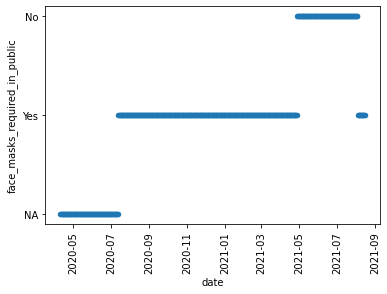

In [9]:
NOLA_df.plot.scatter(x='date', y='face_masks_required_in_public', rot=90) #Taking a quick look at the mask mandates. We won't need the NAs since that's pre-COVID.

Reading in Orleans Parish unemployment stats from the Bureau of Labor Statistics. It's a lot easier to just specify what you need and download the xlsx than trying to web scrape or use their API.

In [11]:
import warnings
warnings.simplefilter("ignore")
NOLA_unemp_df = pd.read_excel (r'./nolaunemp.xlsx')

In [12]:
NOLA_unemp_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020,5.1,5.2,5.3,13.1,13.1,9.4,9.1,8.2,8.0,7.9,7.9,7.9
1,2021,7.6,7.6,7.4,7.2,7.1,6.9,6.6,6.2,5.8,NaN,NaN,NaN


What a silly way of displaying dates in a table, we'll need to change this a bit.

In [13]:
NOLA_unemp_df.rename(columns={'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12,}, inplace=True, errors='raise')
NOLA_unemp_df

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2020,5.1,5.2,5.3,13.1,13.1,9.4,9.1,8.2,8.0,7.9,7.9,7.9
1,2021,7.6,7.6,7.4,7.2,7.1,6.9,6.6,6.2,5.8,NaN,NaN,NaN


Converting the month names to ints will make it easier to meld this into a single datetime column. Let's then melt down the months and create a new date column, drop the Year and month column, and sort by date.

In [14]:
NOLA_unemp_df = NOLA_unemp_df.melt(id_vars=['Year'], var_name='month', value_name='Unemploymet_Rate')
NOLA_unemp_df

,Year,month,Unemploymet_Rate
0,2020,1,5.1
1,2021,1,7.6
2,2020,2,5.2
3,2021,2,7.6
4,2020,3,5.3
5,2021,3,7.4
6,2020,4,13.1
7,2021,4,7.2
8,2020,5,13.1
9,2021,5,7.1


In [15]:
NOLA_unemp_df['Date'] = pd.to_datetime(NOLA_unemp_df[['Year', 'month']].assign(DAY=1))
NOLA_unemp_df

,Year,month,Unemploymet_Rate,Date
0,2020,1,5.1,2020-01-01
1,2021,1,7.6,2021-01-01
2,2020,2,5.2,2020-02-01
3,2021,2,7.6,2021-02-01
4,2020,3,5.3,2020-03-01
5,2021,3,7.4,2021-03-01
6,2020,4,13.1,2020-04-01
7,2021,4,7.2,2021-04-01
8,2020,5,13.1,2020-05-01
9,2021,5,7.1,2021-05-01


In [16]:
NOLA_unemp_df.drop('Year', axis=1, inplace=True)
NOLA_unemp_df.drop('month', axis=1, inplace=True)

In [17]:
NOLA_unemp_df.sort_values(by=['Date'], inplace=True, ascending=True)
NOLA_unemp_df

,Unemploymet_Rate,Date
0,5.1,2020-01-01
2,5.2,2020-02-01
4,5.3,2020-03-01
6,13.1,2020-04-01
8,13.1,2020-05-01
10,9.4,2020-06-01
12,9.1,2020-07-01
14,8.2,2020-08-01
16,8.0,2020-09-01
18,7.9,2020-10-01


In [18]:
NOLA_unemp_df=NOLA_unemp_df.dropna()
NOLA_unemp_df

,Unemploymet_Rate,Date
0,5.1,2020-01-01
2,5.2,2020-02-01
4,5.3,2020-03-01
6,13.1,2020-04-01
8,13.1,2020-05-01
10,9.4,2020-06-01
12,9.1,2020-07-01
14,8.2,2020-08-01
16,8.0,2020-09-01
18,7.9,2020-10-01


In [19]:
yes_masks = NOLA_df.loc[NOLA_df['face_masks_required_in_public']=='Yes'] #This is the best way of splitting up the data for the sake of plotting axvlines, also we don't need the NAs.
no_masks = NOLA_df.loc[NOLA_df['face_masks_required_in_public']=='No']

<AxesSubplot:xlabel='date', ylabel='face_masks_required_in_public'>

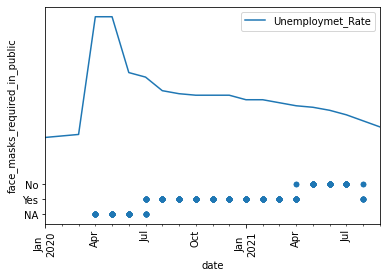

In [20]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ax = NOLA_unemp_df.plot(x='Date', y='Unemploymet_Rate')
NOLA_df.plot.scatter(x='date', y='face_masks_required_in_public', rot=90, ax=ax)

The scatter plot approach isn't really working here, let's try using axvlines to signify mask mandates.

Green lines represent mask mandates being put into effect, red lines represent them ending, in April and August 2021 you can see that mask mandates were put into effect but then rolled back within the month


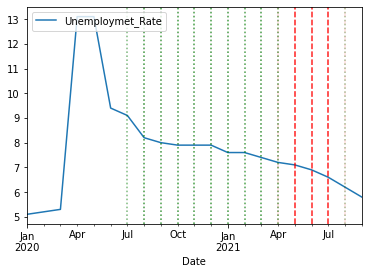

In [21]:
print('Green lines represent mask mandates being put into effect, red lines represent them ending, in April and August 2021 you can see that mask mandates were put into effect but then rolled back within the month')
NOLA_unemp_df.plot(x='Date', y='Unemploymet_Rate')
for row in yes_masks.date:
    plt.axvline(x=row, color='g', alpha=0.03, ls=':')
for row in no_masks.date:
    plt.axvline(x=row, color='r', alpha=0.04, ls='--')
#This is much more legible than the last plot.